In [83]:
#Libraries
import math
import cmath

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [84]:
#setting up for complex numbers
i=complex(0,1)
print(i)

1j


In [85]:
#step potential

#V0 is the magnitude of V(x) for x>0, V(x<0)=0
#assume scattering states (E>0), also assuming E0>V0 since no transmission for E<V0

#Values
h=1#6.626*(10**-34)#h is standing in for hbar since I don't want to convert all of my equations
m=.5#9.109*10**-31#mass of electron


def step_fn(V0,A,E0,x):
    y=np.zeros(len(x))
    k=np.sqrt(2*m*E0)/h
    K=np.sqrt(2*m*(E0-V0))/h
    F=2*A/(1+(k/K))
    B=F-A
    
    for j in range(len(x)):
        if x[j]<0:
            val = A*cmath.exp(i*k*x[j])+B*cmath.exp(-i*k*x[j])
        else:
            val= F*cmath.exp(i*K*x[j])#delete incoming waves from right side of potential
        y[j]=val  
    return y


#transmittance
def step_R(V0,E0):
    return ((cmath.sqrt(E0)-cmath.sqrt(E0-V0))**4)/(V0**2)
def step_T(V0,E0):
    return 1-step_R(V0,E0)

#for animation time dependent solution: step_fn(V0,A,E0,x)*cmath.exp(-i*E0*t/h)*cmath.exp(-L*t/h)
#note for animation: enforce E0>V0 on the sliders to get transmission 

In [86]:
#Test of step potential
V0=10
A=1
E0=14

x=np.linspace(-10,10,100)

h=step_fn(V0,A,E0,x)

print(step_T(10,14))
print(step_R(10,14))

(0.9079866369544756+0j)
(0.09201336304552439+0j)


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


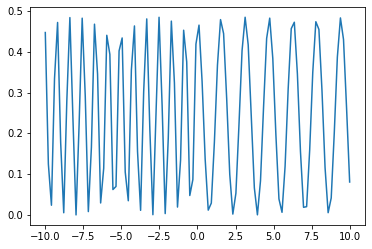

In [87]:
plt.plot(x,h**2)

In [88]:
#Delta-function potential: well V(x)=-α*δ(x)

#A is amplitude of incident wave
#assume scattering states (E0>0)

#Values
h=1#6.626*(10**-34)#h is standing in for hbar since I don't want to convert all of my equations
m=.5#9.109*10**-31#mass of electron


def delta_fn(A,α,E0,x):
    y=np.zeros(len(x))
    k=np.sqrt(2*m*E0)/h
    W=m*α/(k*(h**2))
    #B=A*i*W/(1-(i*W))
    B=A*np.sqrt(2)*W/(1+W**2)
    #F=A/(1-(i*W))
    F=A/np.sqrt(1+W**2)
    
    for j in range(len(x)):
        if x[j]<0:
            val = A*cmath.exp(i*k*x[j])+B*cmath.exp(-i*k*x[j])
        else:
            val = F*cmath.exp(i*k*x[j])#delete incoming waves from right side of potential
        y[j]=val  
    return y
           
#transmittance
def delta_R(α,E0):
    k=np.sqrt(2*m*E0)/h
    W=m*α/(k*(h**2))
    return (W**2)/(1+W**2)
def delta_T(α,E0):
    #k=np.sqrt(2*m*E0)/h
    #W=m*α/(k*(h**2))
    return 1-delta_R(α,E0)

#time dependent: delta_fn()*cmath.exp(-i*E0*t/h)*cmath.exp(-L*t/h), w/ L coefficient of loss

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part


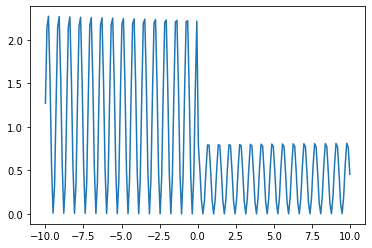

In [89]:
#Delta potential test
α=4
A=1
E0=20

x=np.linspace(-10,10,200)

h=delta_fn(A,α,E0,x)

plt.plot(x,h**2)


In [90]:
#Cliff 

#potential V(x)=0 for x<0, -V0 for x>0
#assume scattering states (E0>0)

#Values
h=1#6.626*(10**-34)#h is standing in for hbar 
m=.5#9.109*10**-31#mass of electron


def cliff_fn(V0,A,E0,x):
    y=np.zeros(len(x))
    k=np.sqrt(2*m*E0)/h
    K=np.sqrt(2*m*(E0+V0))/h
    B=A*((k-K)/(k+K))
    F=A+B
    
    for j in range(len(x)):
        if x[j]<0:
            val = A*cmath.exp(i*k*x[j])+B*cmath.exp(-i*k*x[j])
        else:
            val= F*cmath.exp(i*K*x[j])#delete incoming waves from right side of potential
        y[j]=val  
    return y


#transmittance
def cliff_R(V0,E0):
    k=np.sqrt(2*m*E0)/h
    K=np.sqrt(2*m*(E0+V0))/h
    return ((k-K)/(k+K))**2
def cliff_T(V0,E0):
    #k=np.sqrt(2*m*E0)/h
    #K=np.sqrt(2*m*(E0+V0))/h
    return 1-cliff_R(V0,E0)

#time dependent: cliff_fn()*cmath.exp(-i*E0*t/h)*cmath.exp(-L*t/h), w/ L coefficient of loss
#FOR ANIMATION TEAM: V0 is explicitly a magnitude since I already programmed in a negative sign for the potential in the function

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


0.6656771787363105


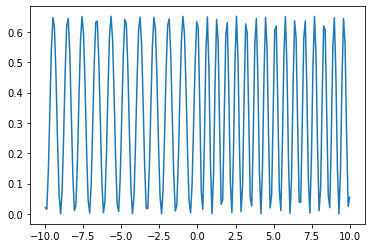

In [91]:
V0=13
A=1
E0=11

x=np.linspace(-10,10,200)

g=cliff_fn(V0,A,E0,x)

plt.plot(x,g**2)

print(cliff_T(13,1))